In [1]:
##Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [5]:
##Load and Explore Dataset
df = pd.read_excel('heart_disease.xlsx') 

In [7]:
df

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [9]:
print(df.head())
print(df.info())
print(df.describe())

        age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes
None
           age                  Age in years
count       12                            12
unique      12                            12
top     Gender  Gender ; Male - 1, Female -0
freq         1                             1


In [11]:
##EDA (Exploratory Data Analysis)
print(df.isnull().sum())

age             0
Age in years    0
dtype: int64


In [15]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

<Axes: >

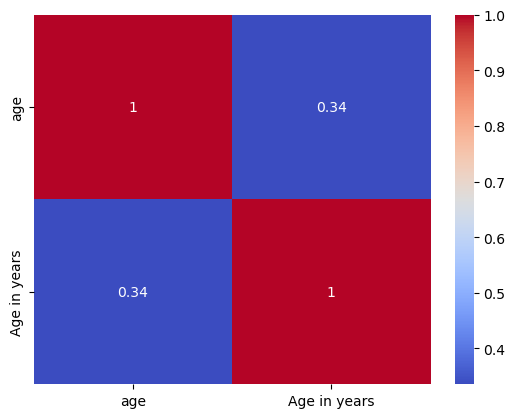

In [17]:
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')

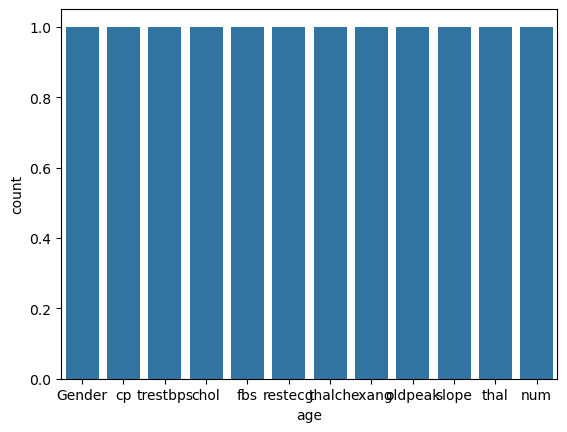

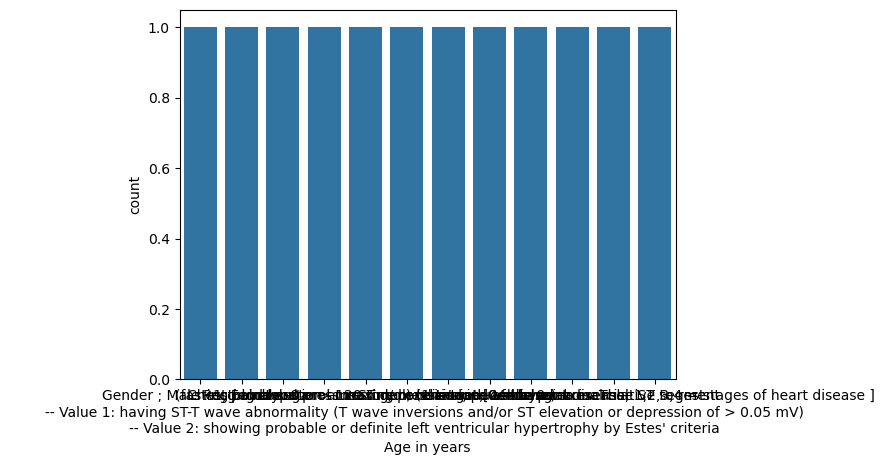

In [19]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    sns.countplot(x=col, data=df)
    plt.show()

In [21]:
##Feature Engineering

In [23]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [25]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [27]:
 ##Train Decision Tree Classifier

In [31]:
print(df.columns)

Index(['age', 'Age in years'], dtype='object')


In [33]:
X = df.drop('Age in years', axis=1)

In [37]:
X

,age
0,0
1,2
2,11
3,1
4,4
5,7
6,10
7,3
8,6
9,8


In [39]:
y = df['Age in years']

In [41]:
y

0      2
1      1
2      3
3      6
4      0
5      7
6      9
7      8
8      4
9     11
10     5
11    10
Name: Age in years, dtype: int32

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
y_pred = dt.predict(X_test)

In [49]:
y_pred

array([9, 7, 6])

In [51]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



C:\Users\sub\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sub\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sub\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sub\anaconda3\Lib\site-packages\sklearn\metri

In [53]:
##Hyperparameter Tuning

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [69]:
params = [
    {'max_depth': 3, 'min_samples_split': 2, 'criterion': 'gini'},
    {'max_depth': 5, 'min_samples_split': 4, 'criterion': 'entropy'},
    {'max_depth': None, 'min_samples_split': 2, 'criterion': 'gini'}
]

In [72]:
best_accuracy = 0
best_model = None
best_params = None

In [74]:
for p in params:
    model = DecisionTreeClassifier(**p, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Params: {p}, Accuracy: {acc:.2f}")


Params: {'max_depth': 3, 'min_samples_split': 2, 'criterion': 'gini'}, Accuracy: 0.00
Params: {'max_depth': 5, 'min_samples_split': 4, 'criterion': 'entropy'}, Accuracy: 0.00
Params: {'max_depth': None, 'min_samples_split': 2, 'criterion': 'gini'}, Accuracy: 0.00


In [76]:
if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_params = p

print("\n Best Parameters:", best_params)
print(" Best Accuracy:", best_accuracy)


 Best Parameters: None
 Best Accuracy: 0


In [92]:
##Visualize the Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
best_model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [86]:
best_model.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [88]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np

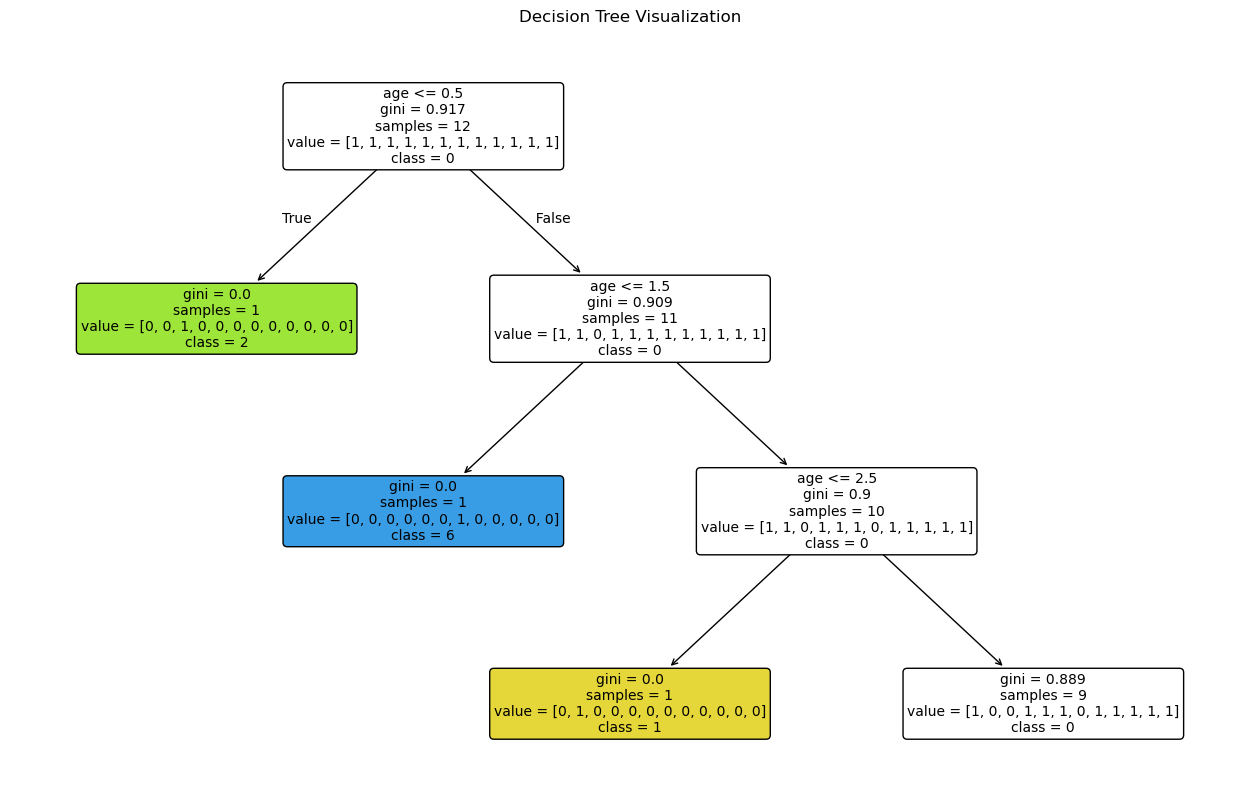

In [90]:
plt.figure(figsize=(16, 10))

plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=[str(c) for c in np.unique(y)],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
Q1. What are some common hyperparameters of decision tree models, and how do they affect performance?

max_depth: Limits the depth to avoid overfitting.

min_samples_split: Minimum samples required to split an internal node; higher values prevent overfitting.

criterion: Function to measure split quality ('gini' or 'entropy').

max_leaf_nodes: Restricts number of leaf nodes to simplify the model.
Q2. What is the difference between Label Encoding and One-hot Encoding?

Label Encoding: Converts categories into integers (0, 1, 2...). Good for ordinal data but may imply order where none exists.

One-hot Encoding: Creates binary columns for each category. Useful for nominal data without introducing order.